In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

In [4]:
path = '1step/txt_file/'
file = os.listdir(path)

myFile1 = []
for f in file:
    if f.endswith('.txt'):
        myFile1.append(f)

dfs1 = []
for f in myFile1:
    dfs1.append(pd.read_csv(path+'/'+f, sep='\t', encoding_errors='ignore'))    
df1 = pd.concat(dfs1, ignore_index=True)
print(df1.shape)
df1.head()

(40995, 402)


,time,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),...,RG monitor [V],RG current limit flag,RB target [V],RB monitor [V],RB current limit flag,5CHV Board A temp monitor [C],update time [s],total SDO read errors,failed HTTP GET count,Unnamed: 401
0,2024-07-29 14:18:46,0.0,0.000042,0.0,0.000000,0.0,0.0,0.000000,0.000086,0.000000,...,246.178,0,700,700.629,0,31.25,0.141,0,0,NaN
1,2024-07-29 14:18:47,0.0,0.000054,0.0,0.000000,0.0,0.0,0.000038,0.000040,0.000047,...,246.178,0,700,700.629,0,31.25,0.141,0,0,NaN
2,2024-07-29 14:18:47,0.0,0.000049,0.0,0.000000,0.0,0.0,0.000000,0.000118,0.000087,...,246.178,0,700,700.629,0,31.25,0.157,0,0,NaN
3,2024-07-29 14:18:47,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000136,0.000040,...,246.178,0,700,700.629,0,31.25,0.157,0,0,NaN
4,2024-07-29 14:18:47,0.0,0.000068,0.0,0.000038,0.0,0.0,0.000095,0.000144,0.000000,...,246.178,0,700,700.629,0,31.25,0.157,0,0,NaN


In [5]:
# separate measurement results from the whole set
df1 = df1.iloc[:,:315]
df1.head()

,time,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),...,(306 Th),(307 Th),(308 Th),(309 Th),(310 Th),(311 Th),(312 Th),(313 Th),(314 Th),(315 Th)
0,2024-07-29 14:18:46,0.0,0.000042,0.0,0.000000,0.0,0.0,0.000000,0.000086,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
1,2024-07-29 14:18:47,0.0,0.000054,0.0,0.000000,0.0,0.0,0.000038,0.000040,0.000047,...,0.0,0.0,0.000024,0.000000,0.0,0.00003,0.0,0.0,0.0,0.0
2,2024-07-29 14:18:47,0.0,0.000049,0.0,0.000000,0.0,0.0,0.000000,0.000118,0.000087,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
3,2024-07-29 14:18:47,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000136,0.000040,...,0.0,0.0,0.000000,0.000036,0.0,0.00000,0.0,0.0,0.0,0.0
4,2024-07-29 14:18:47,0.0,0.000068,0.0,0.000038,0.0,0.0,0.000095,0.000144,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


In [6]:
print(df1['time'].value_counts().get('2024-07-29 14:18:47', 0))
print(df1['time'].value_counts().get('2024-07-29 14:18:48', 0))
print(df1['time'].value_counts().get('2024-07-29 14:18:49', 0))# sampling rate : 5 times a second -> 200 ms

5
5
5


In [7]:
df1['time'] = [round(0.2*i,1) for i in range(len(df1['time']))]
df1.set_index('time', inplace=True)
df1.head()

,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),(11 Th),...,(306 Th),(307 Th),(308 Th),(309 Th),(310 Th),(311 Th),(312 Th),(313 Th),(314 Th),(315 Th)
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.000042,0.0,0.000000,0.0,0.0,0.000000,0.000086,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
0.2,0.0,0.000054,0.0,0.000000,0.0,0.0,0.000038,0.000040,0.000047,0.000000,...,0.0,0.0,0.000024,0.000000,0.0,0.00003,0.0,0.0,0.0,0.0
0.4,0.0,0.000049,0.0,0.000000,0.0,0.0,0.000000,0.000118,0.000087,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
0.6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000136,0.000040,0.000000,...,0.0,0.0,0.000000,0.000036,0.0,0.00000,0.0,0.0,0.0,0.0
0.8,0.0,0.000068,0.0,0.000038,0.0,0.0,0.000095,0.000144,0.000000,0.000074,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


In [9]:
df1.columns = np.arange(2,316,1)
df1.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.000042,0.0,0.000000,0.0,0.0,0.000000,0.000086,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
0.2,0.0,0.000054,0.0,0.000000,0.0,0.0,0.000038,0.000040,0.000047,0.000000,...,0.0,0.0,0.000024,0.000000,0.0,0.00003,0.0,0.0,0.0,0.0
0.4,0.0,0.000049,0.0,0.000000,0.0,0.0,0.000000,0.000118,0.000087,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
0.6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000136,0.000040,0.000000,...,0.0,0.0,0.000000,0.000036,0.0,0.00000,0.0,0.0,0.0,0.0
0.8,0.0,0.000068,0.0,0.000038,0.0,0.0,0.000095,0.000144,0.000000,0.000074,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


In [10]:
df1.to_csv('data/1step.csv')

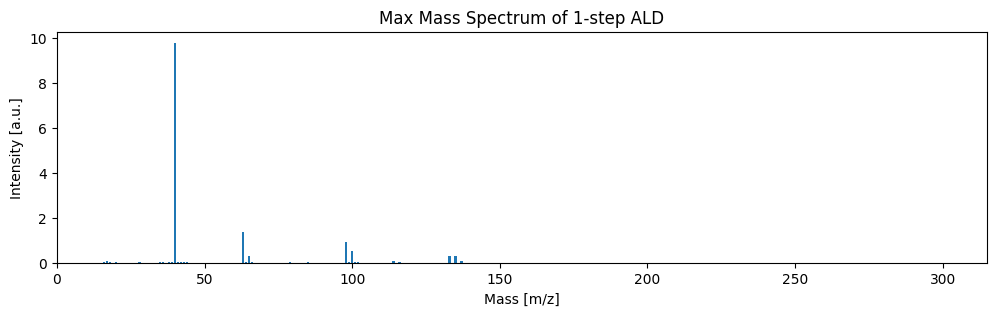

In [11]:
max_df1 = df1.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df1.columns, np.array(max_df1.values.tolist()).flatten())
plt.xlim(0,315)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 1-step ALD')
plt.show()

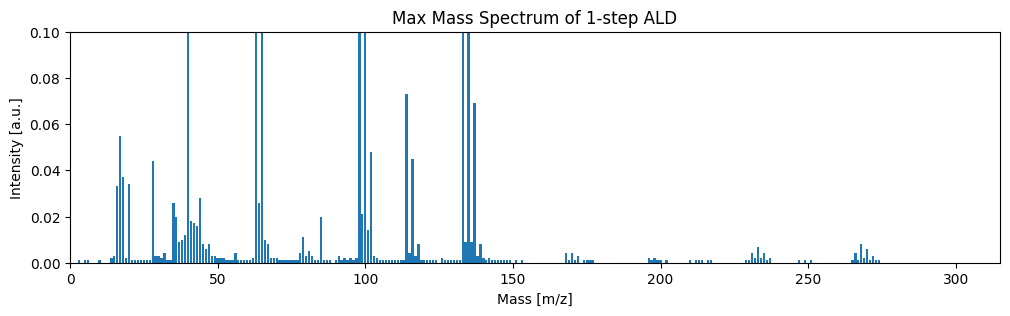

In [64]:
plt.figure(figsize=(12,3))
plt.bar(max_df1.columns, np.array(max_df1.values.tolist()).flatten())
plt.xlim(0,315)
plt.ylim(0,0.1)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 1-step ALD')
plt.show()

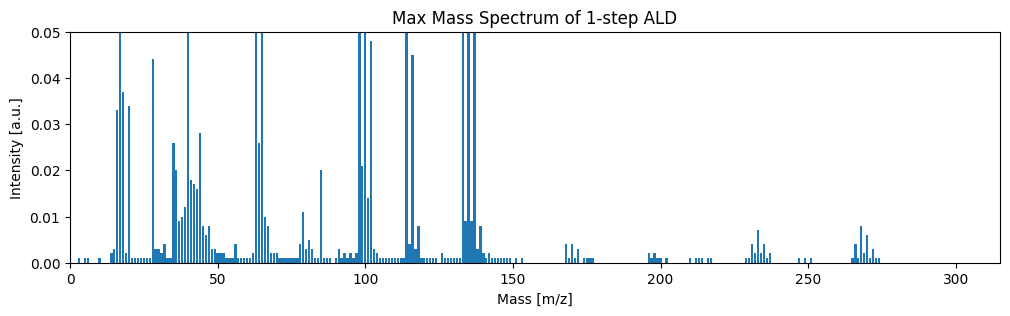

In [65]:
plt.figure(figsize=(12,3))
plt.bar(max_df1.columns, np.array(max_df1.values.tolist()).flatten())
plt.xlim(0,315)
plt.ylim(0,0.05)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 1-step ALD')
plt.show()

In [66]:
max_df1.T.sort_values(by='max', ascending=False)

,max
40,9.783
63,1.372
98,0.906
100,0.504
65,0.306
...,...
311,0.000
312,0.000
313,0.000
314,0.000


In [67]:
max_df1.T.sort_values(by='max', ascending=False).to_csv('data/1step_max.csv')

In [12]:
path = '2step/txt_file/'
file2 = os.listdir(path)

myFile2 = []
for f in file2:
    if f.endswith('.txt'):
        myFile2.append(f)
myFile2

dfs2 = []
for f in myFile2:
    dfs2.append(pd.read_csv(path+'/'+f, sep='\t', encoding_errors='ignore'))    
df2 = pd.concat(dfs2, ignore_index=True)
print(df2.shape)

# separate measurement results from the whole set
df2 = df2.iloc[:,:315]

df2['time'] = [round(0.2*i,1) for i in range(len(df2['time']))]
df2.set_index('time', inplace=True)

df2.columns = np.arange(2,316,1)
df2.head()

(37994, 402)


,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df2.to_csv('data/2step.csv')

In [20]:
max_df2 = df2.agg(['max']).round(3)
max_df2.T.sort_values(by='max', ascending=False).to_csv('data/2step_max.csv')

In [21]:
# random color generator
import random
random.seed(38)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

In [68]:
max_val = max_df1.T
max_val = max_val.rename(columns={'max':'1step'})
max_val['2step'] = max_df2.T['max']
max_val = max_val.reset_index()
max_val['index'] = max_val['index'].apply(lambda x:int(x))

<Axes: xlabel='Name'>

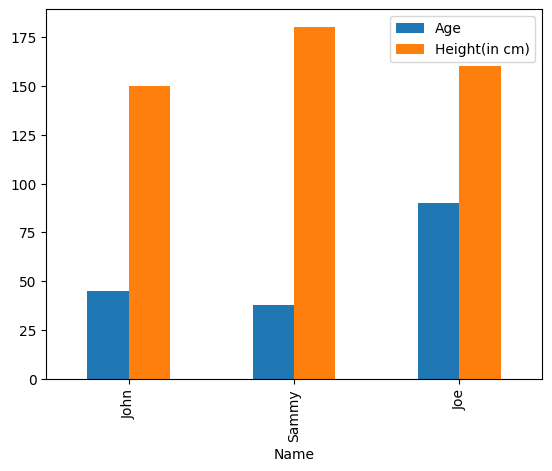

In [23]:
# creating dataframe 
df = pd.DataFrame({ 
    'Name': ['John', 'Sammy', 'Joe'], 
    'Age': [45, 38, 90], 
    'Height(in cm)': [150, 180, 160] 
}) 
  
# plotting graph 
df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar") 

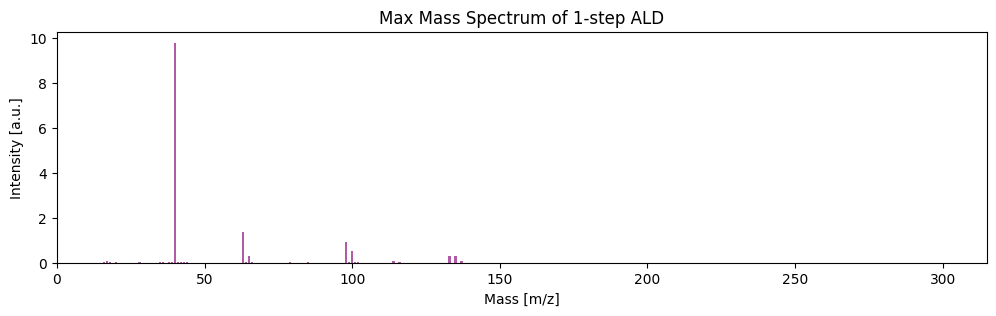

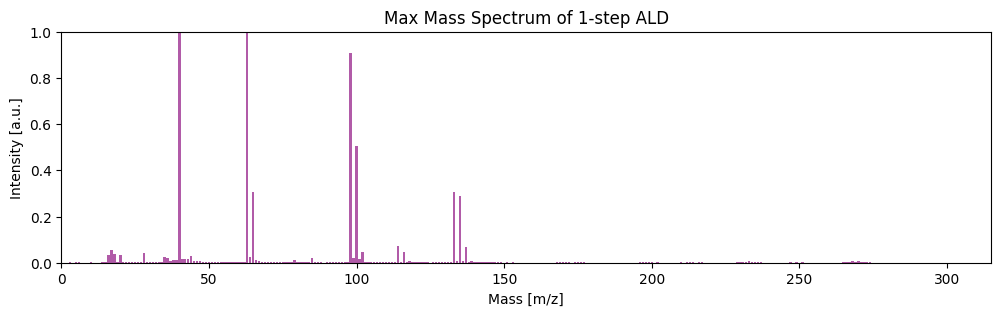

In [69]:
max_df1 = df1.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df1.columns, np.array(max_df1.values.tolist()).flatten(), color=colors[1])
plt.xlim(0,315)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 1-step ALD')
plt.show()

max_df1 = df1.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df1.columns, np.array(max_df1.values.tolist()).flatten(), color=colors[1])
plt.xlim(0,315)
plt.ylim(0,1)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 1-step ALD')
plt.show()

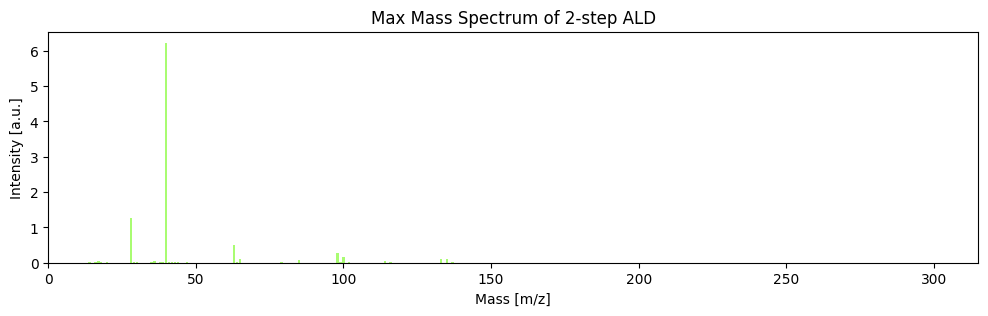

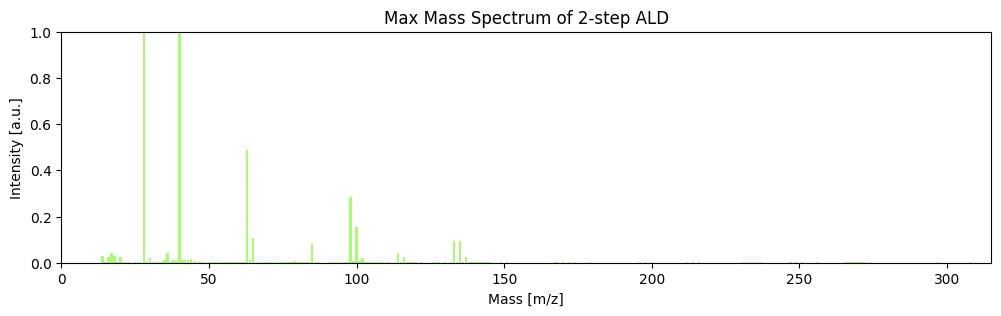

In [70]:
max_df2 = df2.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df2.columns, np.array(max_df2.values.tolist()).flatten(), color=colors[2])
plt.xlim(0,315)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 2-step ALD')
plt.show()

max_df2 = df2.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df2.columns, np.array(max_df2.values.tolist()).flatten(), color=colors[2])
plt.xlim(0,315)
plt.ylim(0,1)
plt.xlabel('Mass [m/z]')
plt.ylabel('Intensity [a.u.]')
plt.title('Max Mass Spectrum of 2-step ALD')
plt.show()

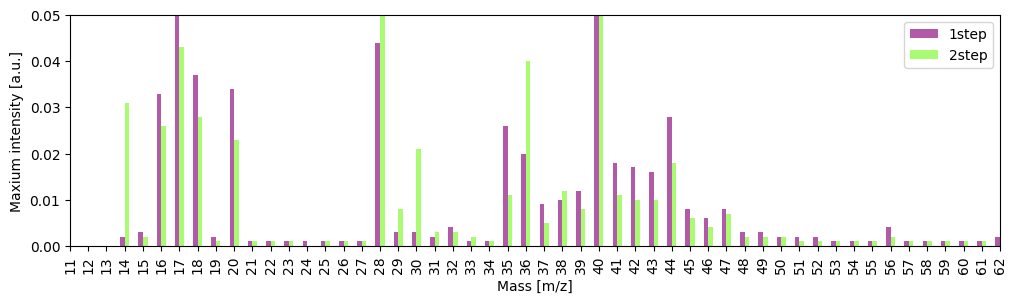

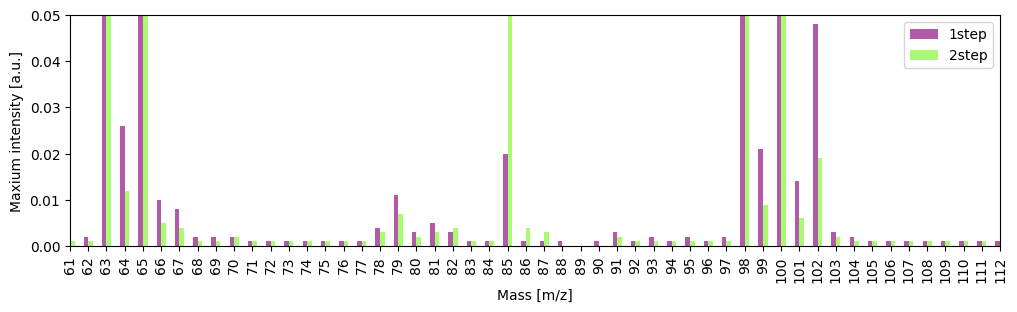

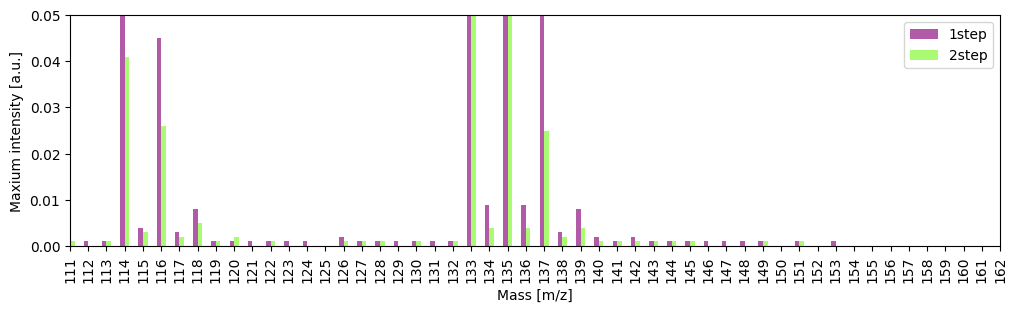

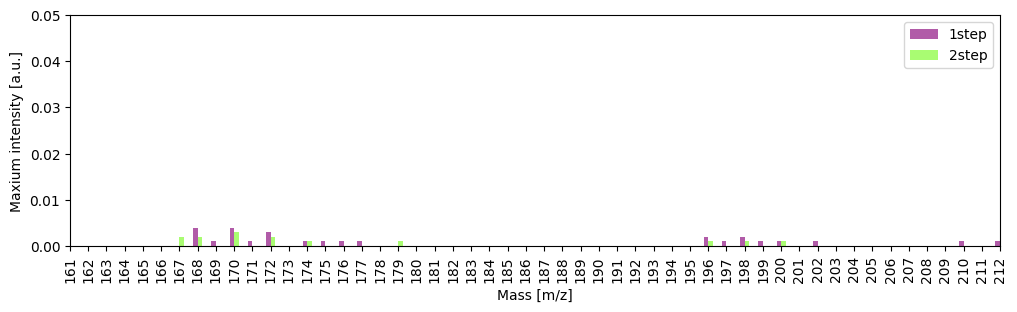

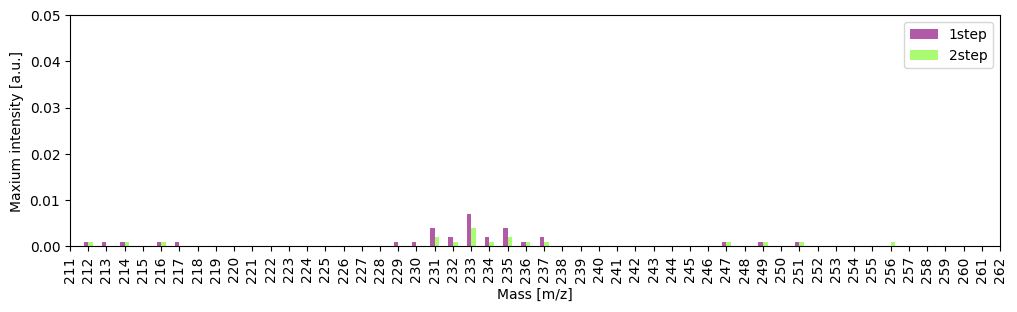

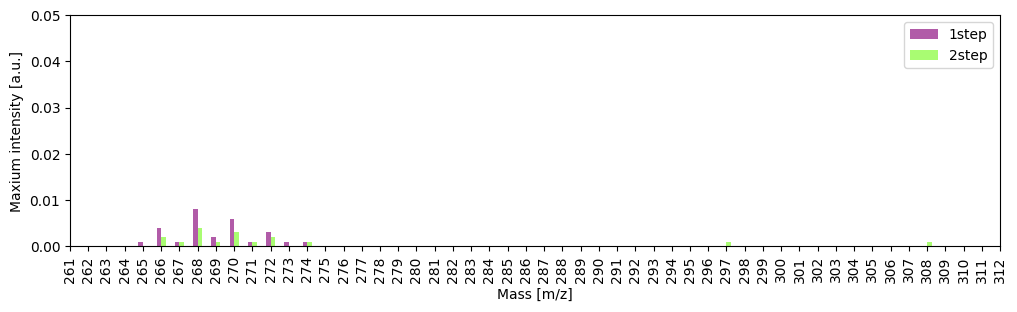

In [90]:
for i in range(6):
    axs = max_val.plot(figsize=(12,3), x='index', y=['1step', '2step'], kind='bar', color=[colors[1], colors[2]])
    plt.xlim([10+50*i-1, 10+50*(i+1)])
    plt.ylim(0,0.05)
    plt.xlabel('Mass [m/z]')
    plt.ylabel('Maxium intensity [a.u.]')
    # plt.title('Comparison between the Max Mass Spectra')
    plt.show()

    fig = axs.get_figure()
    # fig.savefig(f'data/figure/comparison{i}', bbox_inches='tight')

Pre-process : NH3 (~5), NH3-N2 (~6)

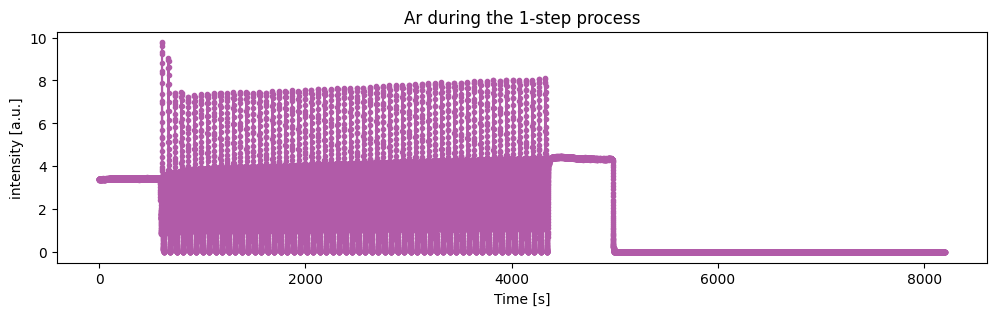

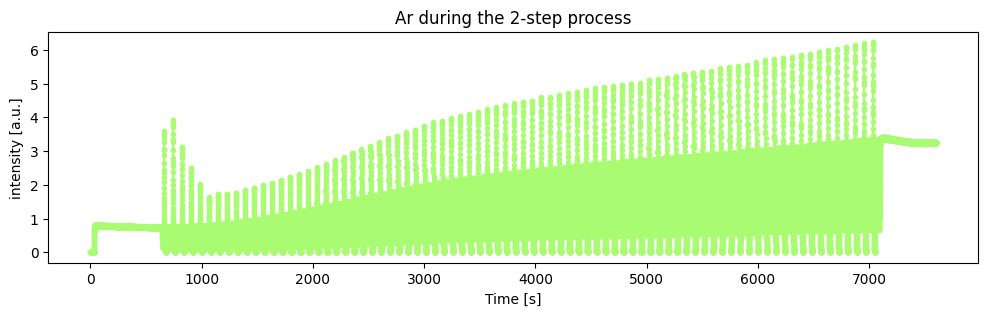

In [80]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1.loc[:,40],'.-', color=colors[1])
plt.xlabel('Time [s]')
# plt.xlim(3000,df.index[-1])
plt.ylabel('intensity [a.u.]')
plt.title('Ar during the 1-step process')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2.loc[:,40],'.-', color=colors[2])
plt.xlabel('Time [s]')
# plt.xlim(3000,df.index[-1])
plt.ylabel('intensity [a.u.]')
plt.title('Ar during the 2-step process')
plt.show()

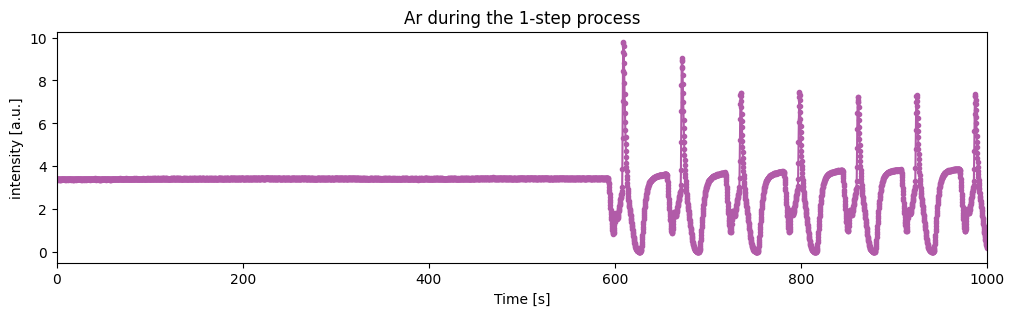

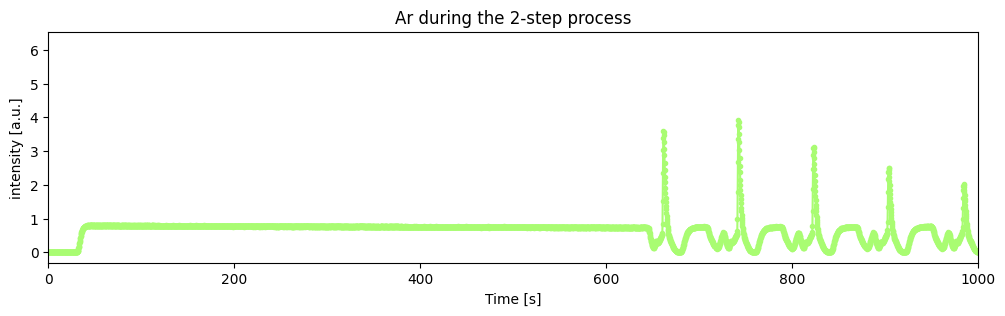

In [81]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1.loc[:,40],'.-', color=colors[1])
plt.xlabel('Time [s]')
plt.xlim(0,1000)
plt.ylabel('intensity [a.u.]')
plt.title('Ar during the 1-step process')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2.loc[:,40],'.-', color=colors[2])
plt.xlabel('Time [s]')
plt.xlim(0,1000)
plt.ylabel('intensity [a.u.]')
plt.title('Ar during the 2-step process')
plt.show()

# to check the start of the processes

In [82]:
# better not rely on the absolute intensity, so turn to the intensity ratio at each time step
# in terms of percentage [%]
df1_ratio = df1.copy()
df1_ratio['sum'] = df1_ratio.sum(axis=1)
for idx, row in df1_ratio.iterrows():
    df1_ratio.loc[idx,:] = df1_ratio.loc[idx,:] / row['sum']
df1_ratio = df1_ratio.drop(columns=['sum'])
df1_ratio.columns = [int(i) for i in df1_ratio.columns]
df1_ratio

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.000012,0.0,0.000000,0.0,0.0,0.000000,0.000025,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0
0.2,0.0,0.000016,0.0,0.000000,0.0,0.0,0.000011,0.000012,0.000014,0.000000,...,0.0,0.0,0.000007,0.00000,0.0,0.000009,0.00000,0.0,0.0,0.0
0.4,0.0,0.000014,0.0,0.000000,0.0,0.0,0.000000,0.000034,0.000025,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0
0.6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000039,0.000011,0.000000,...,0.0,0.0,0.000000,0.00001,0.0,0.000000,0.00000,0.0,0.0,0.0
0.8,0.0,0.000020,0.0,0.000011,0.0,0.0,0.000027,0.000041,0.000000,0.000021,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8198.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000064,0.00081,0.0,0.0,0.0
8198.2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0
8198.4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.0,0.0


In [83]:
df1_ratio.to_csv('data/1step_percent.csv')

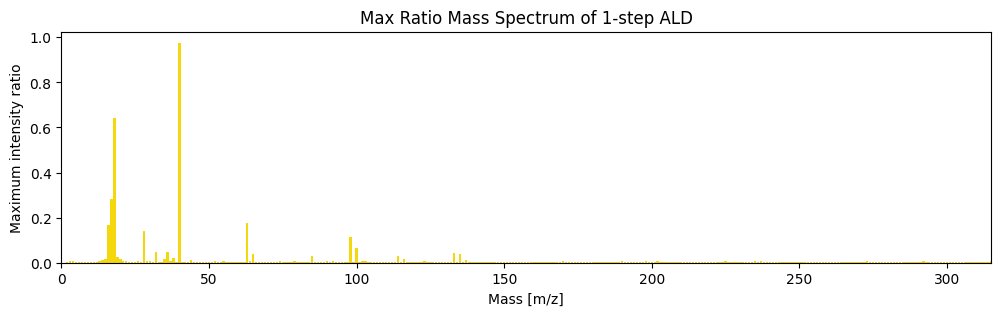

In [84]:
max_df1_ratio = df1_ratio.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df1_ratio.columns, np.array(max_df1_ratio.values.tolist()).flatten(), color=colors[3])
plt.xlim(0,315)
plt.xlabel('Mass [m/z]')
plt.ylabel('Maximum intensity ratio')
plt.title('Max Ratio Mass Spectrum of 1-step ALD')
plt.show()

In [46]:
df2_ratio = pd.read_csv('data/2step_percent.csv', index_col=0)
df2_ratio.columns = [int(i) for i in df2_ratio.columns]
df2_ratio

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
0.2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
0.4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
0.6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
0.8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22795.4,0.000000,0.000011,0.000036,0.0,0.0,0.0,0.000000,0.000009,0.000043,0.000041,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
22795.6,0.000008,0.000021,0.000015,0.0,0.0,0.0,0.000000,0.000013,0.000012,0.000008,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000012,0.0
22795.8,0.000009,0.000000,0.000000,0.0,0.0,0.0,0.000013,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00001,0.000000,0.0


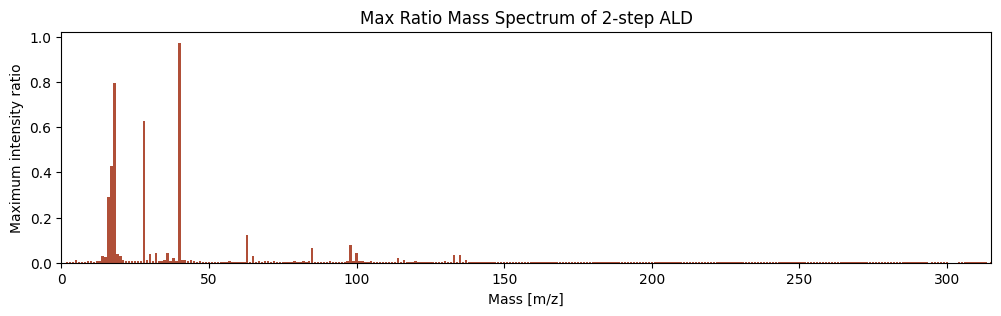

In [85]:
max_df2_ratio = df2_ratio.agg(['max']).round(3)
plt.figure(figsize=(12,3))
plt.bar(max_df2_ratio.columns, np.array(max_df2_ratio.values.tolist()).flatten(), color=colors[4])
plt.xlim(0,315)
plt.xlabel('Mass [m/z]')
plt.ylabel('Maximum intensity ratio')
plt.title('Max Ratio Mass Spectrum of 2-step ALD')
plt.show()

In [ ]:
max_val_ratio = max_df1_ratio.T
max_val_ratio = max_val_ratio.rename(columns={'max':'1step'})
max_val_ratio['2step'] = max_df2_ratio.T['max']
max_val_ratio = max_val_ratio.reset_index()
max_val_ratio['index'] = max_val_ratio['index'].apply(lambda x:int(x))

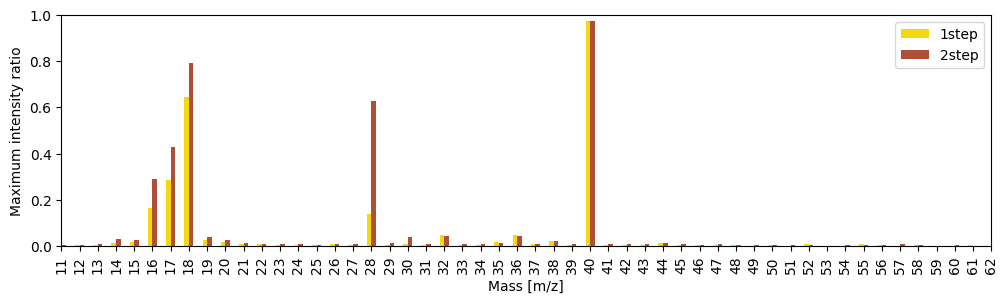

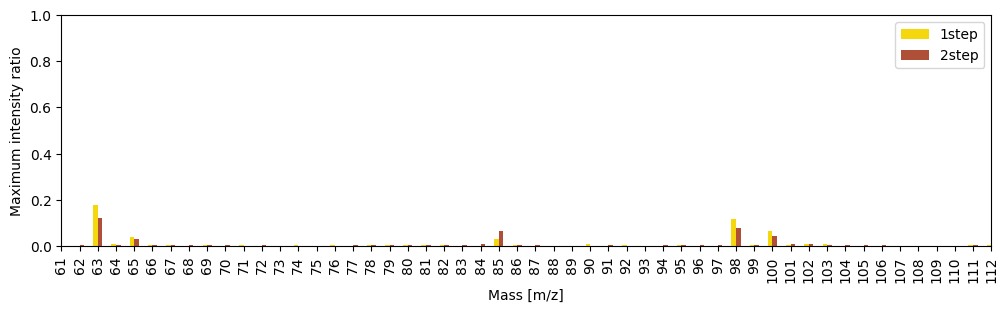

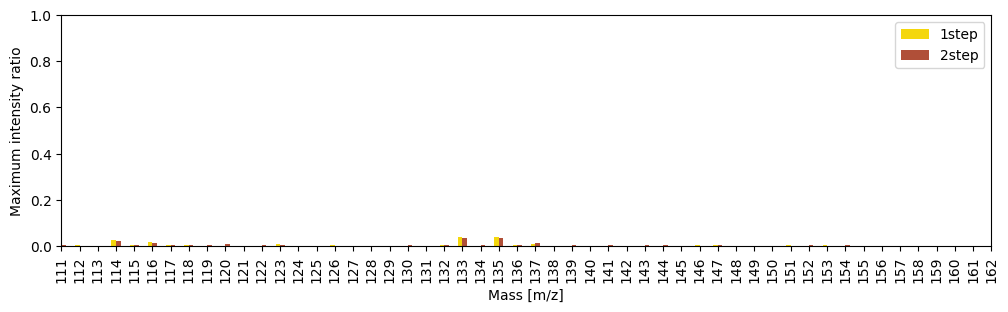

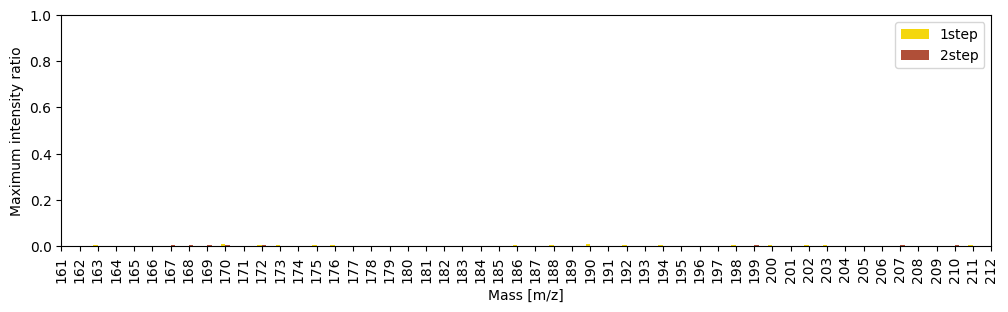

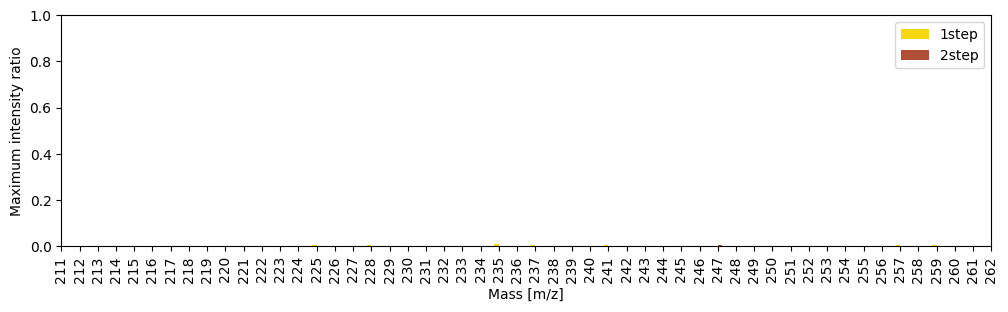

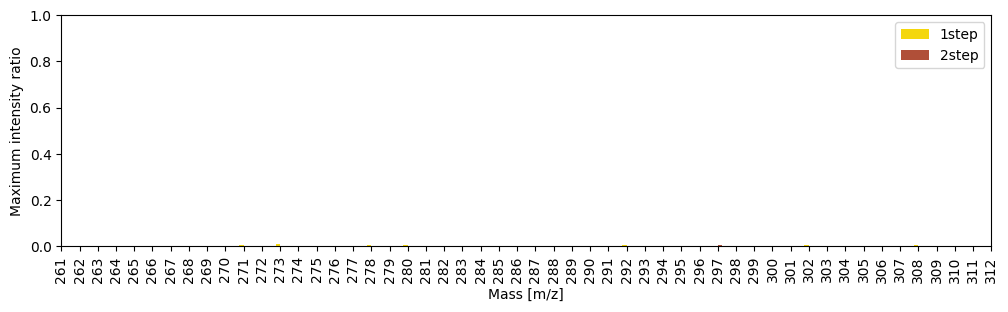

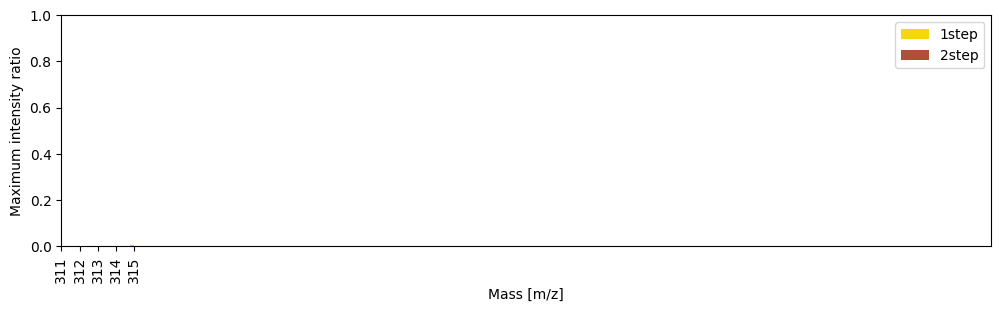

In [112]:
for i in range(7):
    axs = max_val_ratio.plot(figsize=(12,3), x='index', y=['1step', '2step'], kind='bar', color=[colors[3], colors[4]])
    plt.xlim([10+50*i-1, 10+50*(i+1)])
    plt.ylim(0,1)
    plt.xlabel('Mass [m/z]')
    plt.ylabel('Maximum intensity ratio')
    # plt.title('Comparison between the Max Mass Spectra')
    plt.show()

    fig = axs.get_figure()
    # fig.savefig(f'data/figure/comparison_ratio{i}', bbox_inches='tight')

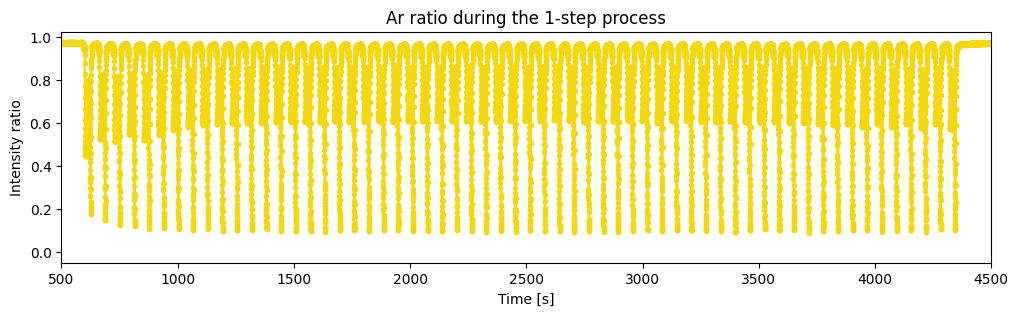

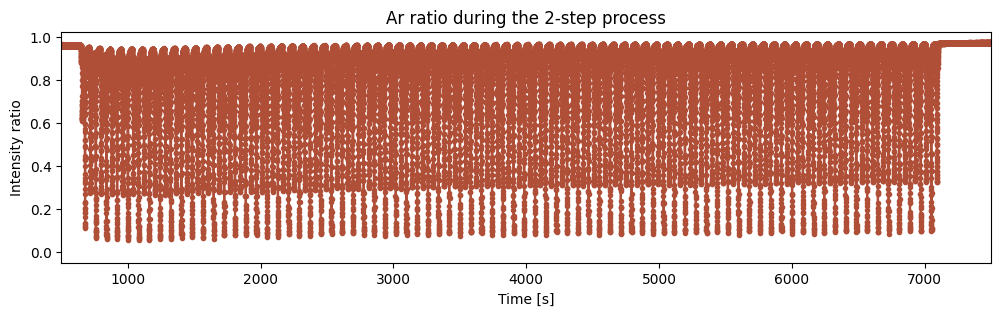

In [105]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_ratio.loc[:,40],'.-', color=colors[3])
plt.xlim(500,4500)
plt.xlabel('Time [s]')
plt.ylabel('Intensity ratio')
plt.title('Ar ratio during the 1-step process')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2_ratio.loc[:,40],'.-', color=colors[4])
plt.xlim(500,7500)
plt.xlabel('Time [s]')
plt.ylabel('Intensity ratio')
plt.title('Ar ratio during the 2-step process')
plt.show()

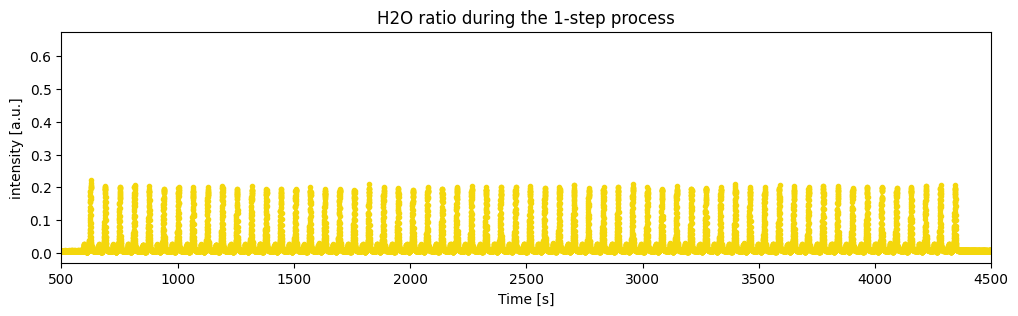

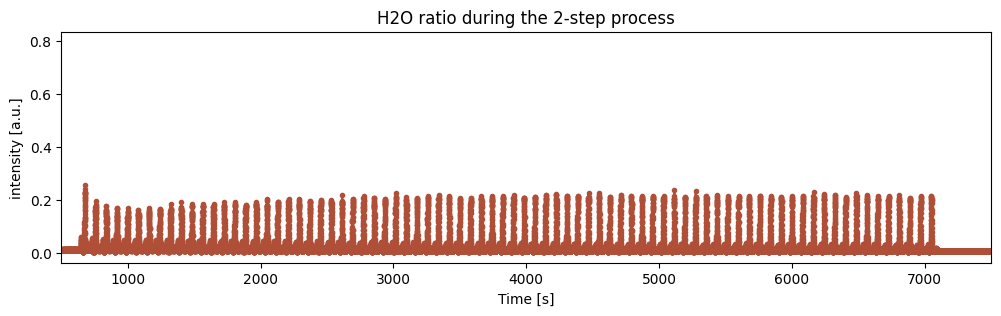

In [106]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_ratio.loc[:,18],'.-', color=colors[3])
plt.xlim(500,4500)
plt.xlabel('Time [s]')
plt.ylabel('intensity [a.u.]')
plt.title('H2O ratio during the 1-step process')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2_ratio.loc[:,18],'.-', color=colors[4])
plt.xlim(500,7500)
plt.xlabel('Time [s]')
plt.ylabel('intensity [a.u.]')
plt.title('H2O ratio during the 2-step process')
plt.show()

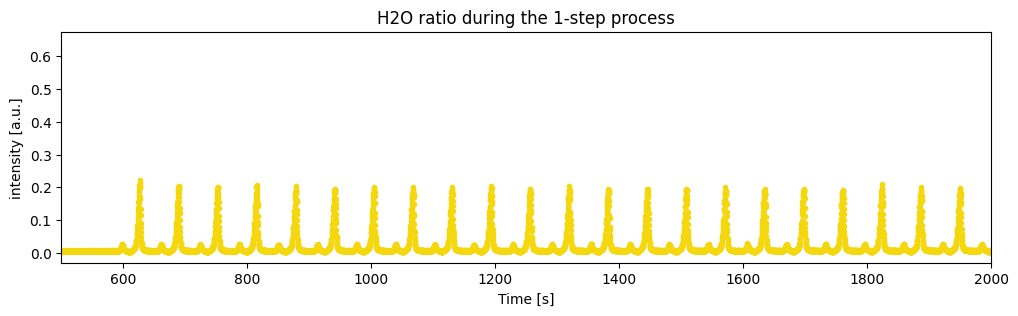

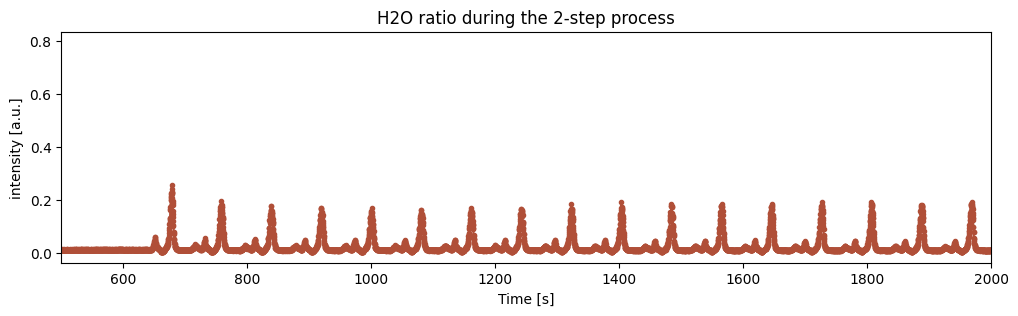

In [108]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_ratio.loc[:,18],'.-', color=colors[3])
plt.xlim(500,2000)
plt.xlabel('Time [s]')
plt.ylabel('intensity [a.u.]')
plt.title('H2O ratio during the 1-step process')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2_ratio.loc[:,18],'.-', color=colors[4])
plt.xlim(500,2000)
plt.xlabel('Time [s]')
plt.ylabel('intensity [a.u.]')
plt.title('H2O ratio during the 2-step process')
plt.show()

In [149]:
df1_ratio.loc[:,264:268].sum(axis=1).index

Index([   0.0,    0.2,    0.4,    0.6,    0.8,    1.0,    1.2,    1.4,    1.6,
          1.8,
       ...
       8197.0, 8197.2, 8197.4, 8197.6, 8197.8, 8198.0, 8198.2, 8198.4, 8198.6,
       8198.8],
      dtype='float64', name='time', length=40995)

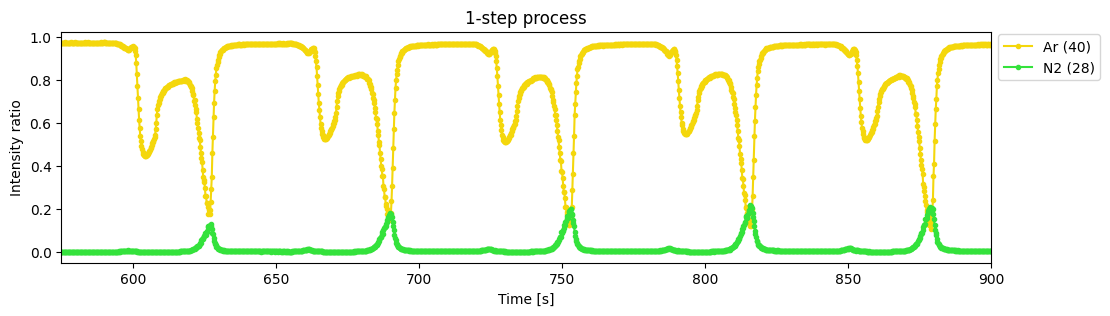

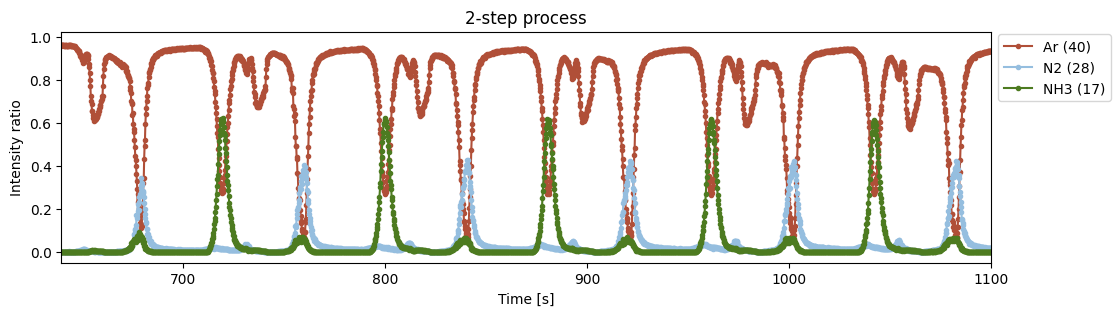

In [148]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_ratio.loc[:,40],'.-', color=colors[3])
plt.plot(df1_ratio.loc[:,17],'.-', color=colors[5])
plt.xlabel('Time [s]')
plt.xlim(575,900)
plt.ylabel('Intensity ratio')
plt.title('1-step process')
plt.legend(['Ar (40)','N2 (28)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df2_ratio.loc[:,40],'.-', color=colors[4])
plt.plot(df2_ratio.loc[:,17],'.-', color=colors[6])
plt.plot(df2_ratio.loc[:,28],'.-', color=colors[9])
plt.xlabel('Time [s]')
plt.xlim(640,1100)
plt.ylabel('Intensity ratio')
plt.legend(['Ar (40)','N2 (28)','NH3 (17)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.title('2-step process')
plt.show()

# to check the start of the processes

In [ ]:
# two interactive plots
# make them interactive
import plotly.graph_objects as go

x = df1_ratio.loc[:,40].index
y1 = df1_ratio.loc[:,40]
y2 = df1_ratio.loc[:,17]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y1, mode='lines+markers', name='Ar(40)'), 
                       go.Scatter(x=x, y=y2, mode='lines+markers', name='NH3(17)')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[575,900], yaxis_range=[0,1], xaxis_title='Time [s]', 
                  yaxis_title='Intensity ratio', title='1-step process')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)

#1
scatter1 = fig.data[0]
cust_color1 = colors[3]
scatter1.line.color = cust_color1
scatter1.marker.color = [cust_color1] * len(x)
scatter1.marker.size = [4] * len(x)
scatter1.marker.line.color = [cust_color1] * len(x)
scatter1.marker.line.width = [1] * len(x)
#2
scatter2 = fig.data[1]
cust_color2 = colors[5]
scatter2.line.color = cust_color2
scatter2.marker.color = [cust_color2] * len(x)
scatter2.marker.size = [4] * len(x)
scatter2.marker.line.color = [cust_color2] * len(x)
scatter2.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    #1
    c1 = list(scatter1.marker.color)
    s1 = list(scatter1.marker.size)
    for i in points.point_inds:
        c1[i] = colors[2]
        s1[i] = 10
        with fig.batch_update():
            scatter1.marker.color = c1
            scatter1.marker.size = s1
    #2
    c2 = list(scatter2.marker.color)
    s2 = list(scatter2.marker.size)
    for j in points.point_inds:
        c2[j] = colors[3]
        s2[j] = 10
        with fig.batch_update():
            scatter2.marker.color = c2
            scatter2.marker.size = s2
            
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
    
def display_value(trace, points, selector):
    for point in points.point_inds:
        print(point)
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{np.round(x_value,3)}</b>", ax=0, ay=-25, font=dict(size=10))       
def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
# scatter1.on_click(wrapper)
scatter2.on_click(wrapper)
# scatter.on_click(store_value)

fig.show()